## Spotify Data Discovery on the Most Listened Songs(EDA)

### Data Cleaning

#### Getting to know the data


In [70]:
import pandas as pd

df = pd.read_csv("spotify.csv")

print(df.head())

print(df.info())

print(df.columns)

print(df.isnull().sum())


                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  key   mode  \
0                147  141381703                  4

#### Cleaning up Missing Data

In [71]:
df_filled = df.fillna("")

#### Remove Unnecessary Columns
We can remove columns that are not important for analysis or repeat the same information

In [72]:
df = df.drop(columns=["cover_url"])  

In [73]:
print(df.duplicated().sum())

df = df.drop_duplicates()

0


#### Clearing Column Names

In [74]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

### Basic Statistical Summaries

#### Convert columns that should be numeric

In [75]:
df["streams"] = pd.to_numeric(df["streams"], errors='coerce')
df["in_deezer_playlists"] = pd.to_numeric(df["in_deezer_playlists"], errors='coerce')
df["in_shazam_charts"] = pd.to_numeric(df["in_shazam_charts"], errors='coerce')

In [76]:
numeric_df = df.select_dtypes(include=['number'])

In [77]:
# Mean
mean_values = numeric_df.mean()
print("Means:\n", mean_values)

#Median
median_values = numeric_df.median()
print("\nMedians:\n", median_values)

#Standard Deviation
std_values = numeric_df.std()
print("\nStandard Deviations:\n", std_values)

Means:
 artist_count            1.556139e+00
released_year           2.018238e+03
released_month          6.033578e+00
released_day            1.393075e+01
in_spotify_playlists    5.200125e+03
in_spotify_charts       1.200944e+01
streams                 5.141374e+08
in_apple_playlists      6.781217e+01
in_apple_charts         5.190871e+01
in_deezer_playlists     1.097403e+02
in_deezer_charts        2.666317e+00
in_shazam_charts        5.117634e+01
bpm                     1.225404e+02
danceability_%          6.696957e+01
valence_%               5.143127e+01
energy_%                6.427912e+01
acousticness_%          2.705771e+01
instrumentalness_%      1.581322e+00
liveness_%              1.821301e+01
speechiness_%           1.013116e+01
dtype: float64

Medians:
 artist_count                    1.0
released_year                2022.0
released_month                  6.0
released_day                   13.0
in_spotify_playlists         2224.0
in_spotify_charts               3.0
streams   

#### Correlation Analysis

In [78]:
numeric_df = df.select_dtypes(include=['number'])

In [79]:
correlation_matrix = numeric_df.corr()

print("correlation matrix:\n")
print(correlation_matrix)

correlation matrix:

                      artist_count  released_year  released_month  \
artist_count              1.000000       0.087586        0.037995   
released_year             0.087586       1.000000        0.076714   
released_month            0.037995       0.076714        1.000000   
released_day             -0.017549       0.174282        0.080313   
in_spotify_playlists     -0.101966      -0.392204       -0.104757   
in_spotify_charts        -0.018507       0.069678       -0.047623   
streams                  -0.136463      -0.230803       -0.024938   
in_apple_playlists       -0.051074      -0.198998       -0.000164   
in_apple_charts          -0.088597      -0.035842       -0.019064   
in_deezer_playlists      -0.093797      -0.218476       -0.044869   
in_deezer_charts         -0.003732       0.095389       -0.005286   
in_shazam_charts         -0.030868       0.014473       -0.101204   
bpm                      -0.038375      -0.005334       -0.039252   
danceability_

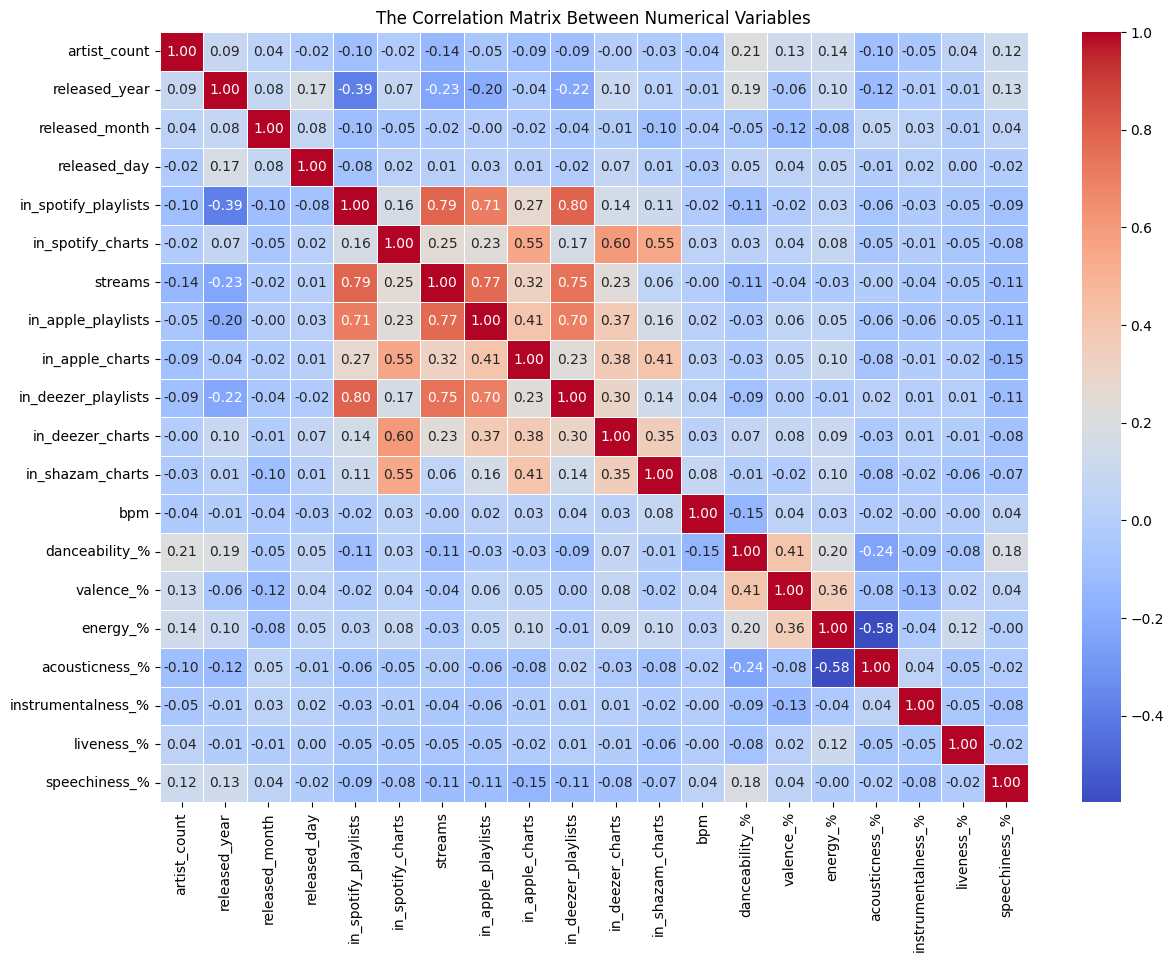

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))

# heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("The Correlation Matrix Between Numerical Variables")
plt.show()

### Visualizations

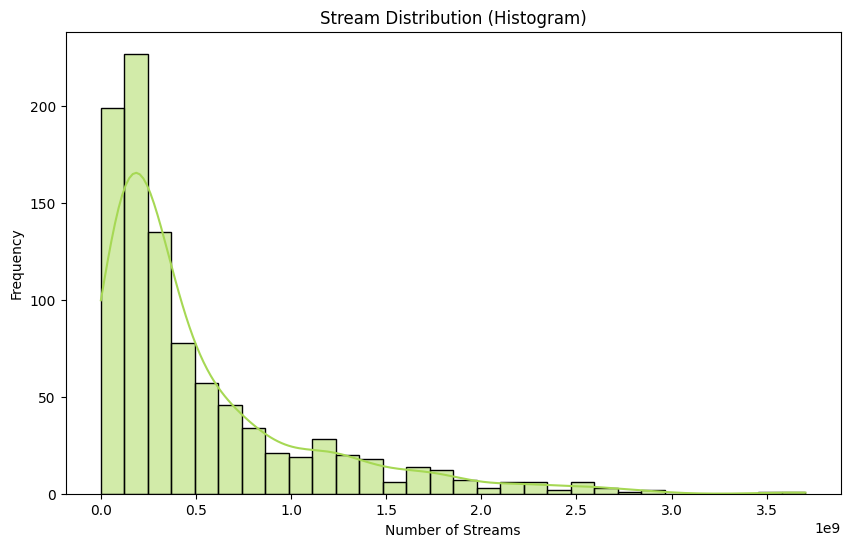

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df["streams"], bins=30, kde=True, color=sns.color_palette("Set2")[4])
plt.title("Stream Distribution (Histogram)")
plt.xlabel("Number of Streams")
plt.ylabel("Frequency")
plt.show()


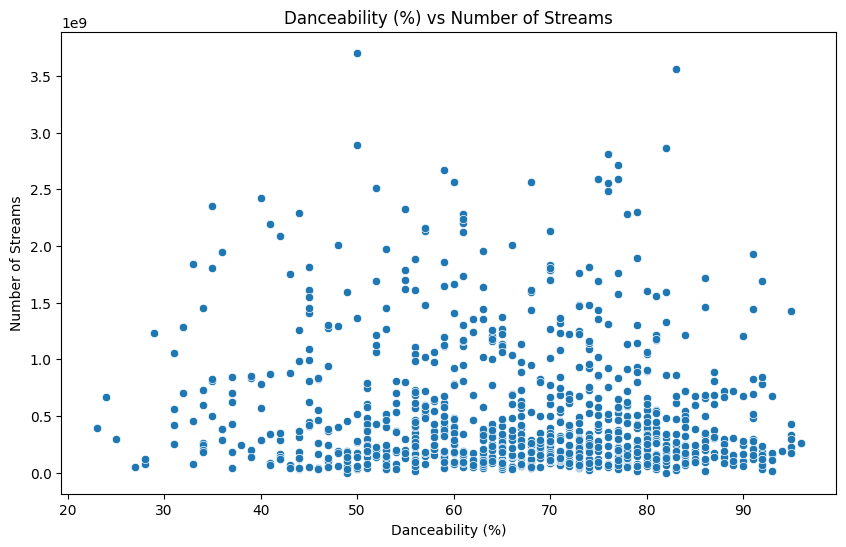

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="danceability_%", y="streams", data=df)
plt.title("Danceability (%) vs Number of Streams")
plt.xlabel("Danceability (%)")
plt.ylabel("Number of Streams")
plt.show()

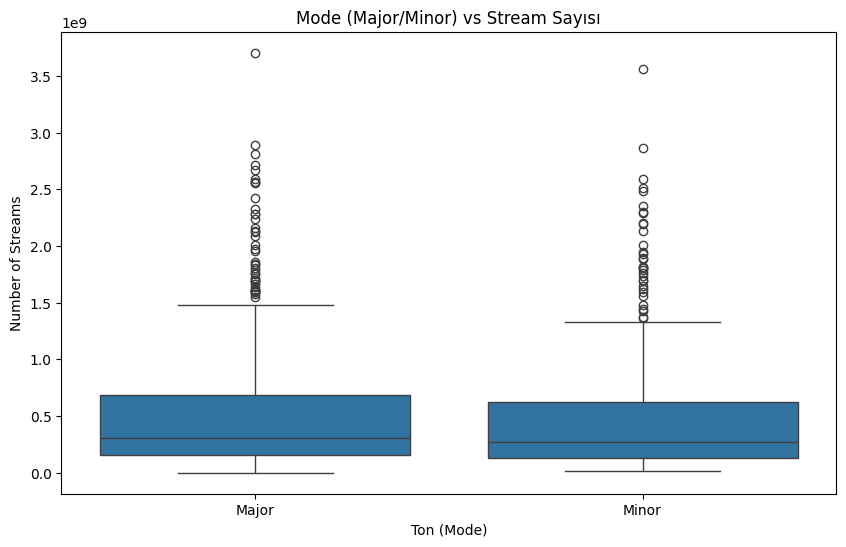

In [83]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="mode", y="streams", data=df)
plt.title("Mode (Major/Minor) vs Stream Sayısı")
plt.xlabel("Ton (Mode)")
plt.ylabel("Number of Streams")
plt.show()

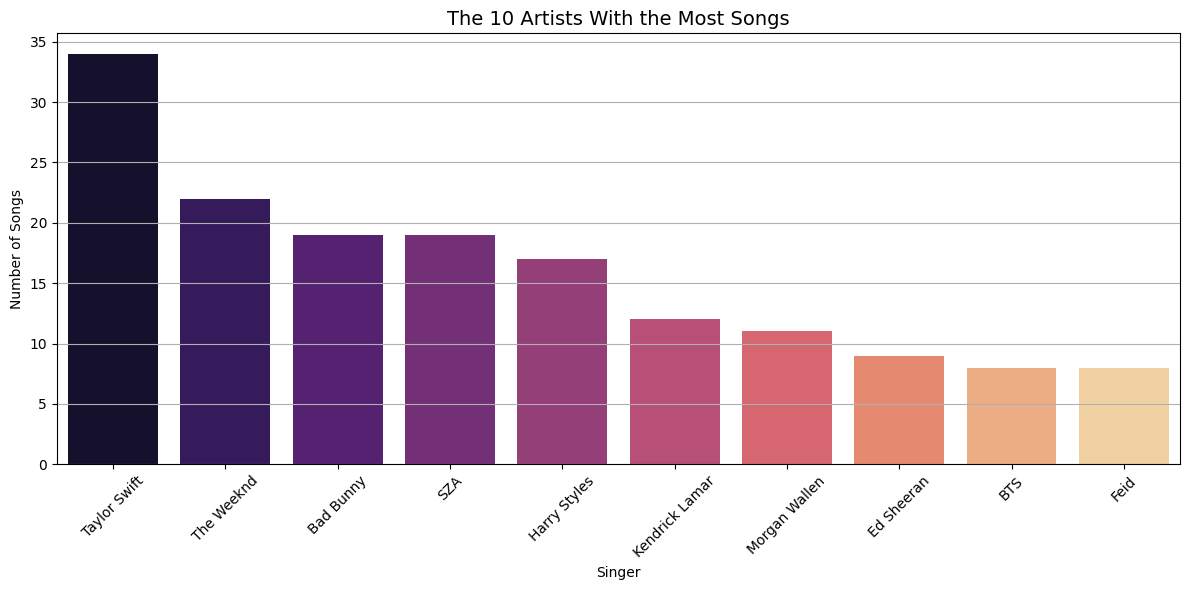

In [84]:
top_artists = df["artist(s)_name"].value_counts().head(10)
artist_df = pd.DataFrame({
    "Singer": top_artists.index,
    "Number of Songs": top_artists.values
})

plt.figure(figsize=(12, 6))
sns.barplot(
    data=artist_df,
    x="Singer",
    y="Number of Songs",
    hue="Singer",
    palette="magma",
    dodge=False,
    legend=False
)

plt.title("The 10 Artists With the Most Songs", fontsize=14)
plt.xlabel("Singer")
plt.ylabel("Number of Songs")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


### Descriptive Analyses

#### The 10 Most Listened Songs

In [85]:
top_songs = df[["track_name", "artist(s)_name", "streams"]].sort_values(by="streams", ascending=False).head(10).copy()

top_songs["streams"] = top_songs["streams"].apply(lambda x: f"{x / 1_000_000_000:.2f}B")

top_songs.reset_index(drop=True, inplace=True)
top_songs.index = top_songs.index + 1  
top_songs.index.name = "No" 

print("\n🎵 The 10 Most Listened Songs:\n")
display(top_songs)


🎵 The 10 Most Listened Songs:



,track_name,artist(s)_name,streams
No,,,
1,Blinding Lights,The Weeknd,3.70B
2,Shape of You,Ed Sheeran,3.56B
3,Someone You Loved,Lewis Capaldi,2.89B
4,Dance Monkey,Tones and I,2.86B
5,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.81B
6,One Dance,"Drake, WizKid, Kyla",2.71B
7,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2.67B
8,Believer,Imagine Dragons,2.59B
9,Closer,"The Chainsmokers, Halsey",2.59B


#### The 10 Singers With the Most Songs

In [86]:
from IPython.display import display
import pandas as pd

top_artists = df["artist(s)_name"].value_counts().head(10)

top_artists_df = pd.DataFrame({
    "Singer": top_artists.index,
    "Number of Songs": top_artists.values
})

top_artists_df.index = top_artists_df.index + 1
top_artists_df.index.name = "No"

print("\nThe 10 Singers With the Most Songs:\n")
display(top_artists_df)



The 10 Singers With the Most Songs:



,Singer,Number of Songs
No,,
1,Taylor Swift,34
2,The Weeknd,22
3,Bad Bunny,19
4,SZA,19
5,Harry Styles,17
6,Kendrick Lamar,12
7,Morgan Wallen,11
8,Ed Sheeran,9
9,BTS,8


#### Distribution of the Number of Songs by Year

In [87]:
from IPython.display import display

songs_by_year = df["released_year"].value_counts().sort_index()

songs_by_year_df = pd.DataFrame({
    "Year": songs_by_year.index,
    "Number of Songs": songs_by_year.values
})

songs_by_year_df.index = songs_by_year_df.index + 1
songs_by_year_df.index.name = "No"

print("\nDistribution of the Number of Songs by Year:\n")
display(songs_by_year_df)



Distribution of the Number of Songs by Year:



,Year,Number of Songs
No,,
1,1930,1
2,1942,1
3,1946,1
4,1950,1
5,1952,1
6,1957,2
7,1958,3
8,1959,2
9,1963,3


#### Mean and Standard Deviation (All Numeric Columns)

In [88]:
numeric_df = df.select_dtypes(include="number")

mean_values = numeric_df.mean()
std_values = numeric_df.std()

stats_df = pd.DataFrame({
    "Mean": mean_values,
    "Standard Deviation": std_values
})

stats_df.index.name = "Feature"

display(stats_df)


,Mean,Standard Deviation
Feature,,
artist_count,1.556139e+00,8.930442e-01
released_year,2.018238e+03,1.111622e+01
released_month,6.033578e+00,3.566435e+00
released_day,1.393075e+01,9.201949e+00
in_spotify_playlists,5.200125e+03,7.897609e+03
in_spotify_charts,1.200944e+01,1.957599e+01
streams,5.141374e+08,5.668569e+08
in_apple_playlists,6.781217e+01,8.644149e+01
in_apple_charts,5.190871e+01,5.063024e+01


#### Average Values For Musical Characteristics

In [89]:
musical_features = ["bpm", "danceability_%", "energy_%", "valence_%"]

musical_avg = df[musical_features].mean()

musical_df = pd.DataFrame({
    "Average": musical_avg
})

musical_df.index.name = "Feature"

display(musical_df)


,Average
Feature,
bpm,122.540399
danceability_%,66.969570
energy_%,64.279119
valence_%,51.431270


### Predictive Analyses

### Predictive Analyses

#### Sample scenario

Predicting the estimated number of streams a song will receive by looking at its characteristics.

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import pandas as pd

df_numeric = df.select_dtypes(include="number")
y = df_numeric["streams"]
X = df_numeric.drop(columns=["streams"])

imputer_X = SimpleImputer(strategy="mean")
X_imputed = pd.DataFrame(imputer_X.fit_transform(X), columns=X.columns)

imputer_y = SimpleImputer(strategy="mean")
y_imputed = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel()

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")


R² Score: 0.72
Mean Squared Error: 76421967174781856.00


In [91]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [92]:
y_pred = model.predict(X_test)

In [102]:
r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

print(f"R^2 Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

R^2 Score: 0.72
Mean Squared Error: 76421967174781856.00


In [103]:
importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
display(importance)

in_spotify_charts       5.099254e+06
released_year           3.964247e+06
released_day            2.603823e+06
in_apple_playlists      2.147447e+06
released_month          1.096081e+06
in_deezer_playlists     6.096853e+05
acousticness_%          5.245127e+05
bpm                     5.037563e+04
in_spotify_playlists    3.714916e+04
danceability_%         -9.862073e+04
in_apple_charts        -1.797446e+05
liveness_%             -5.419721e+05
in_shazam_charts       -5.563750e+05
valence_%              -5.860591e+05
energy_%               -8.208485e+05
instrumentalness_%     -1.004579e+06
speechiness_%          -1.374854e+06
in_deezer_charts       -8.215847e+06
artist_count           -2.332131e+07
dtype: float64

### Hyperparameter Tuning 

In [95]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

param_grid = {
    "alpha": [0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring="r2")

grid_search.fit(X_train, y_train)

print(f"Best alpha: {grid_search.best_params_['alpha']}")
print(f"Best R² Score (CV): {grid_search.best_score_:.2f}")


Best alpha: 10
Best R² Score (CV): 0.75


In [96]:
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
r2_best = r2_score(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)

print(f"📈 Test Set R²: {r2_best:.2f}")
print(f"📉 Test Set MSE: {mse_best:.2f}")


📈 Test Set R²: 0.72
📉 Test Set MSE: 76443493043454096.00


In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 20, None]
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring="r2", n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

print(f"Best Params: {grid_search_rf.best_params_}")
print(f"Best Cross-Validated R² Score: {grid_search_rf.best_score_:.2f}")


Best Params: {'max_depth': None, 'n_estimators': 100}
Best Cross-Validated R² Score: 0.81


In [100]:
best_rf_model = grid_search_rf.best_estimator_

y_pred_rf = best_rf_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"📈 R² on Test Set: {r2_rf:.2f}")
print(f"📉 MSE on Test Set: {mse_rf:.2f}")

📈 R² on Test Set: 0.81
📉 MSE on Test Set: 51738383950847744.00
